## Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [100]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(
        f'C:/Users/Elijah Gaft/Desktop/names/yob{year}.txt',
        names=['Name','Gender','Count']
    )
# names_all = pd.concat(names_by_year)
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all

,Name,Gender,Count
1900,Mary,F,16706
1900,Helen,F,6343
1900,Anna,F,6114
1900,Margaret,F,5304
1900,Ruth,F,4765
...,...,...,...
2000,Zeph,M,5
2000,Zeven,M,5
2000,Ziggy,M,5
2000,Zo,M,5


In [102]:
df_filter = names_all['Name'].isin(['Ruth', 'Robert']) ### Выборка как в SQL
task1 = names_all[df_filter]
task1

,Name,Gender,Count
1900,Ruth,F,4765
1900,Robert,F,24
1900,Robert,M,3821
1900,Ruth,M,16
1901,Ruth,F,3974
...,...,...,...
1999,Robert,F,24
1999,Robert,M,14539
2000,Ruth,F,907
2000,Robert,F,23


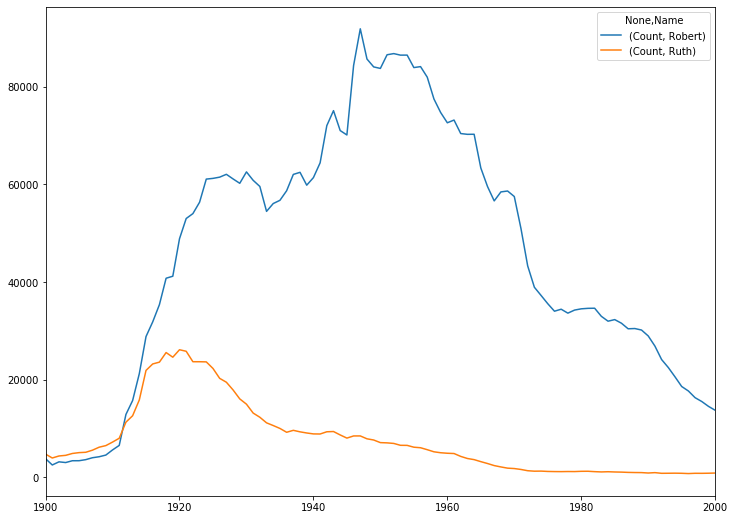

In [103]:
# Агрегируем количество имен по годам и по полу
gender_dynamics = task1.groupby([task1.index, 'Name']).sum()
# gender_dynamics
gender_dynamics.unstack('Name').plot()

## Построить столбчатую диаграмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).


In [116]:
names_by_year = {}
for year in range(1900, 2001):
    if str(year)[-1] == '5' or str(year)[-1] == '0':
        names_by_year[year] = pd.read_csv(
            f'C:/Users/Elijah Gaft/Desktop/names/yob{year}.txt',
            names=['Name','Gender','Count']
        )
    # names_all = pd.concat(names_by_year)
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all

,Name,Gender,Count
1900,Mary,F,16706
1900,Helen,F,6343
1900,Anna,F,6114
1900,Margaret,F,5304
1900,Ruth,F,4765
...,...,...,...
2000,Zeph,M,5
2000,Zeven,M,5
2000,Ziggy,M,5
2000,Zo,M,5


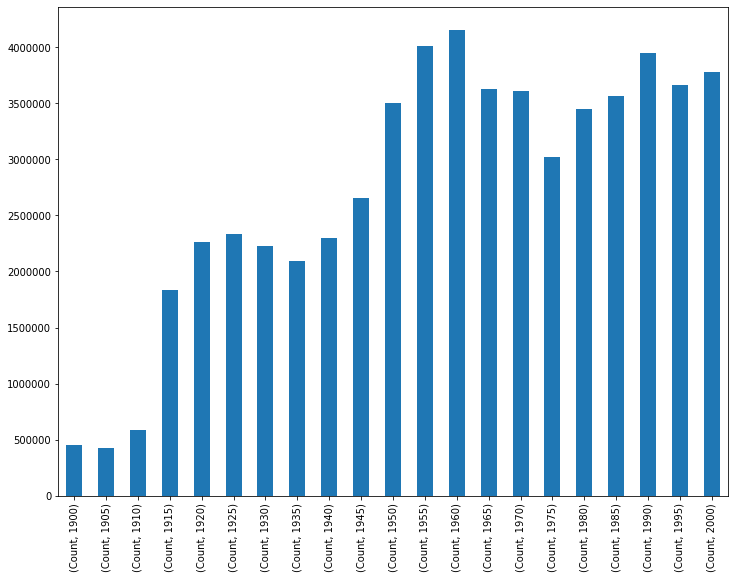

In [117]:
# Агрегируем количество имен по годам и по полу
dynamics = names_all.groupby([names_all.index]).sum()
dynamics.unstack().plot(kind='bar')

## Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.


In [106]:
names_by_year = {}
for year in range(1950,1951):
    names_by_year[year] = pd.read_csv(
        f'C:/Users/Elijah Gaft/Desktop/names/yob{year}.txt',
        names=['Name','Gender','Count']
    )
# names_all = pd.concat(names_by_year)
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all

,Name,Gender,Count
1950,Linda,F,80431
1950,Mary,F,65481
1950,Patricia,F,47945
1950,Barbara,F,41552
1950,Susan,F,38017
...,...,...,...
1950,Zachery,M,5
1950,Zackary,M,5
1950,Zannie,M,5
1950,Zeke,M,5


In [107]:
names_R = names_all[['Name']].applymap(lambda x: x[0])
names_all['First_letter'] = names_R 
df_filter = names_all['First_letter'].isin(['R']) ### Выборка как в SQL
task2 = names_all[df_filter]
task2 = task2.sort_values('Count', ascending=False)
task2


,Name,Gender,Count,First_letter
1950,Robert,M,83559,R
1950,Richard,M,51000,R
1950,Ronald,M,29914,R
1950,Roger,M,12549,R
1950,Raymond,M,11180,R
...,...,...,...,...
1950,Roetta,F,5,R
1950,Rodena,F,5,R
1950,Roda,F,5,R
1950,Roanna,F,5,R


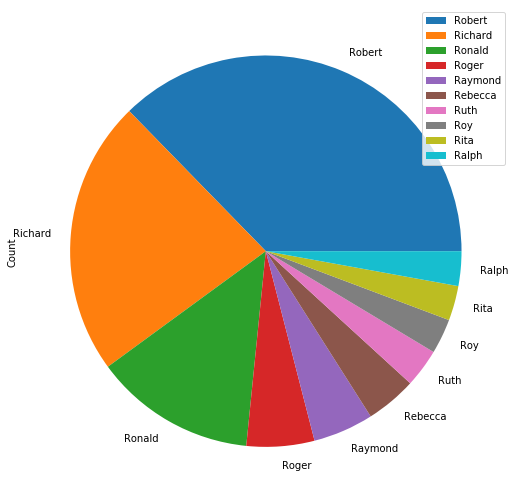

In [108]:
name_dynamics = task2.groupby(['Name']).sum().sort_values(by='Count', ascending=False).head(10)
# name_dynamics.plot(kind='pie')
name_dynamics.plot(kind='pie', y='Count')

## Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [109]:
names_by_year = {}
for year in range(1900,2001):
    names_by_year[year] = pd.read_csv(
        f'C:/Users/Elijah Gaft/Desktop/names/yob{year}.txt',
        names=['Name','Gender','Count']
    )
# names_all = pd.concat(names_by_year)
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all

,Name,Gender,Count
1900,Mary,F,16706
1900,Helen,F,6343
1900,Anna,F,6114
1900,Margaret,F,5304
1900,Ruth,F,4765
...,...,...,...
2000,Zeph,M,5
2000,Zeven,M,5
2000,Ziggy,M,5
2000,Zo,M,5


In [110]:
gr_name = names_all.groupby(['Name']).sum().sort_values(by='Count', ascending=False)
gr_name = gr_name.reset_index()

In [111]:
def foo(x):
    counter = 0
    for i in list(x):
        if i in ['a', 'e', 'o', 'q', 'u', 'y','A', 'E', 'O', 'Q', 'U', 'Y']:
            pass
        else:
            counter = counter+1
    return counter

In [112]:
names_count_letter = gr_name[['Name']].applymap(lambda x: foo(x))
gr_name['names_count_letter'] = names_count_letter
gr_name


,Name,Count,names_count_letter
0,James,4810411,3
1,John,4740064,3
2,Robert,4639055,4
3,Michael,4023404,5
4,Mary,3853845,2
...,...,...,...
70549,Jeramyah,5,4
70550,Bruster,5,5
70551,Mashaya,5,3
70552,Brunna,5,4


In [113]:
# gr_name = gr_name.groupby(['names_count_letter']).sum().sort_values(by='Count', ascending=False)
# gr_name

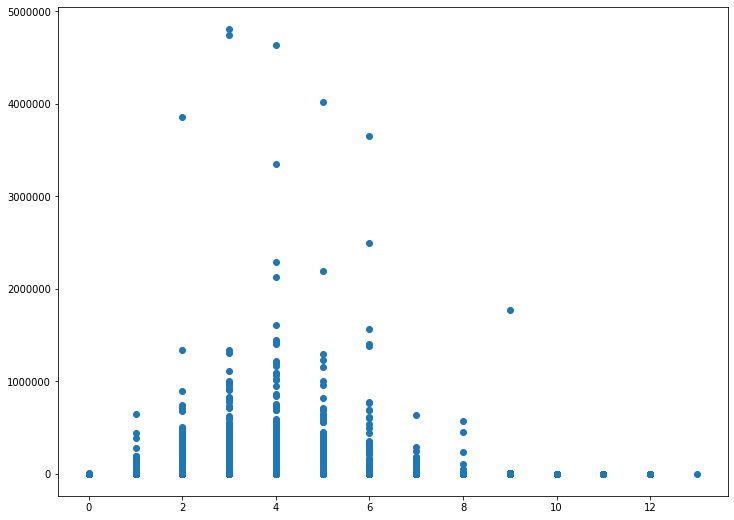

In [114]:
plt.scatter(gr_name['names_count_letter'],gr_name['Count'])